# Comparison of Gender Gap in STEM
[The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases annually a data containing the percentage of bachelor's degrees award to women from 1970 to 2010.
Randal Olson obtained, cleaned this data set and made it available [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). In this notebook we investigate the gender gap in STEM degrees using this data set and explore effective communication of findings using effective data visualization in python. 

In [30]:
# load the data set.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
women_degrees.head(5)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


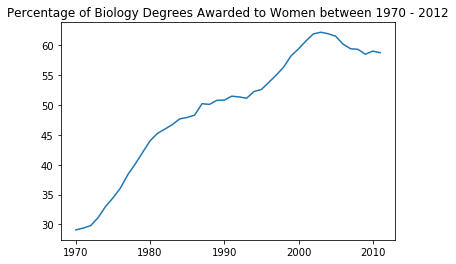

In [31]:
# Plot a line chart showing the historical percentage of Biology degrees awarded to women
fig,ax = plt.subplots()
ax.plot(women_degrees["Year"],women_degrees["Biology"])
ax.set_title("Percentage of Biology Degrees Awarded to Women between 1970 - 2012")
plt.show()

# Findings:
It can be seen from the plot the number Biology Degree awarded to women has been on the increase since 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. 

Now lets compare this findings with the number Biology Degree awarded to Men.

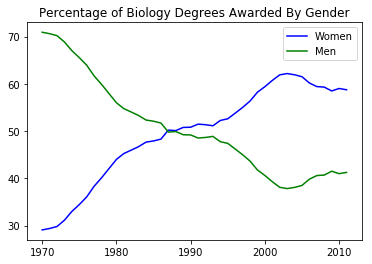

In [11]:
# The percentage of Biology degree awarded to men can be obtained by subtracting 100 from Biology column.
plt.plot(women_degrees['Year'],women_degrees['Biology'], c="blue",label="Women")
plt.plot(women_degrees['Year'], 100 - women_degrees['Biology'],c="green",label="Men")
ax.tick_params(bottom="off",top="off",left="off",right="off")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
plt.show()

# Findings:

While percentage of Biology degree awrded to women is increasing, It can be seen from the plot the number Biology Degree awarded to men has been decreasing since 1970. You can also see that stayed below 50% around 1987.

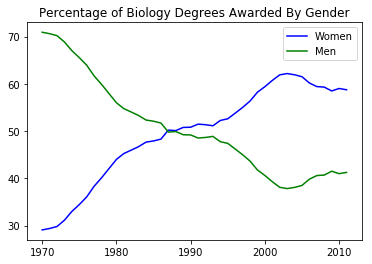

In [15]:
# To make the chart cleaner, the spines can be removed from the chart.
plt.plot(women_degrees['Year'],women_degrees['Biology'], c="blue",label="Women")
plt.plot(women_degrees['Year'], 100 - women_degrees['Biology'],c="green",label="Men")
ax.tick_params(bottom="off",top="off",left="off",right="off")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
plt.show()

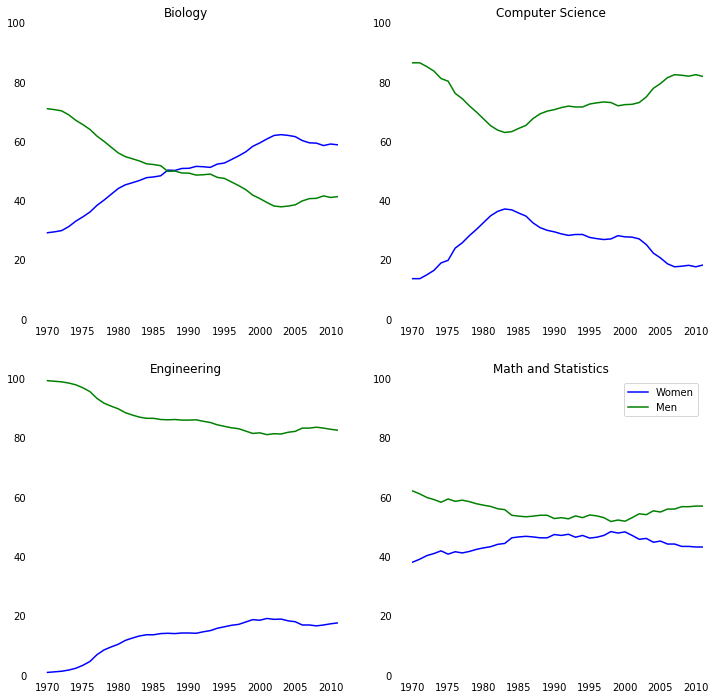

In [20]:
# To compare gender gap in the four STEM major categories a list major_degree_cats is created with degrees as shown below.
major_degree_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[i]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[i]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_degree_cats[i])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

# Findings:
From the plot it can be concluded that the gender gap in Computer Science and Engineering are quite big while the gap in Biology and Math and Statistics is quite small.

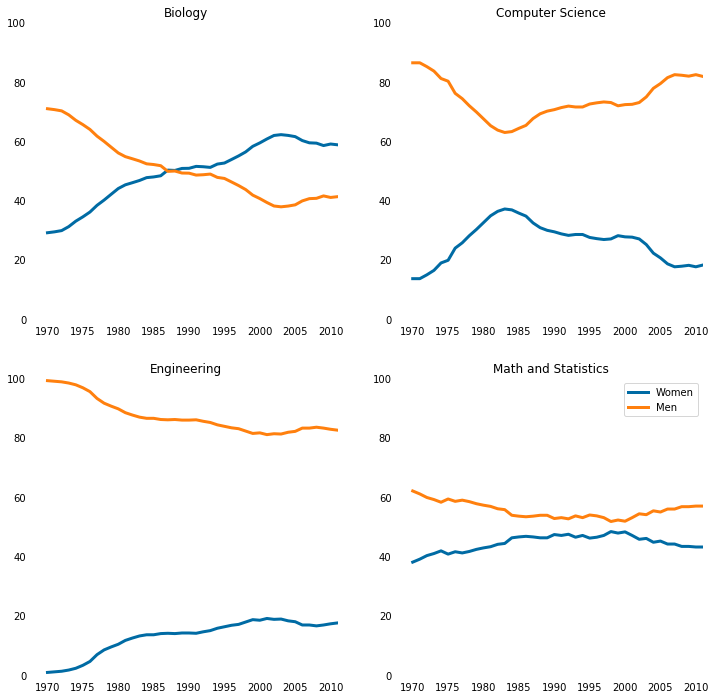

In [24]:
# modify line chart color to custom color in RGB format and add linewidth
fig = plt.figure(figsize=(12, 12))

for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    # The color for each line is assigned here.
    dark_blue = (0/255,107/255,164/255)
    orange_color = (255/255,128/255,14/255)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[i]], c=dark_blue, label='Women',linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[i]], c=orange_color, label='Men',linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_degree_cats[i])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

So far the plot just contains 4 out of 6 STEM degrees in the data set. To add the remaining STEM degree on the 2 by 2 subplot you either add a new column or a new row. Either of these solution will make it difficult for the viewer.
To make the viewing experience more coherent, we can:
 - use layout of a single row with multiple columns
 - order the plots in decreasing order of initial gender gap

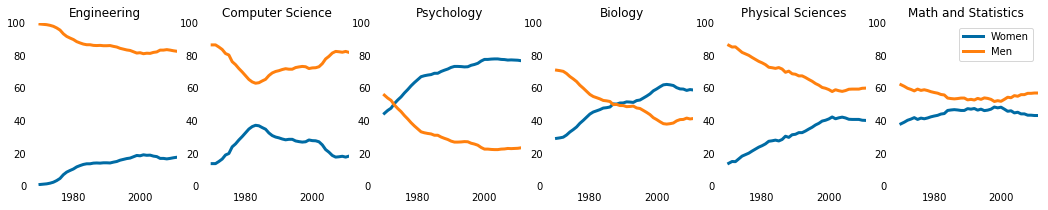

In [28]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))
for i in range(0,6):
    ax = fig.add_subplot(1,6,i+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[i]], c=dark_blue, label='Women',linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[i]], c=orange_color, label='Men',linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[i])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

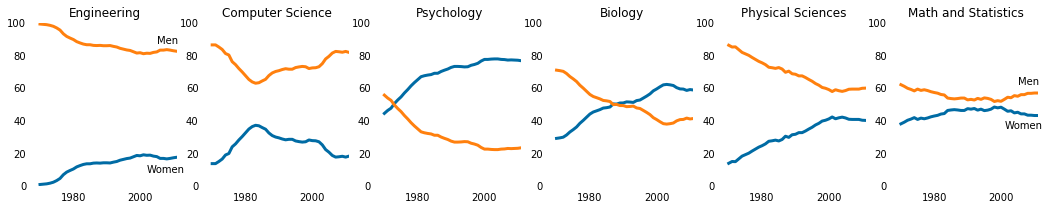

In [29]:
# Using text annotation instead of legend
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))
for i in range(0,6):
    ax = fig.add_subplot(1,6,i+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[i]], c=dark_blue, label='Women',linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[i]], c=orange_color, label='Men',linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[i])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    if i == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif i == 5 :
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women') 
#plt.legend(loc='upper right')
plt.show()